# Some Nice Data visualisations

## Animations

In [7]:
import sys
import os
sys.path.append(os.getcwd() + "/..")
from agent.multiagent.ERLMulti import ERLMulti
import datetime
from simulation.main.Entity import EntityType
# import pickle
import dill as pickle
import numpy as np
import os
from simulation.multi_agent_sim.hardcode_agents.HardCodeAgents import *
from simulation.multi_agent_sim.MultiStateRep import MultiAgentStateRep
# from simulation.multi_agent_sim.MultiAgentSimulation import MultiAgentSimulation
from simulation.discrete_ma_sim.discrete_multi_agent_sim import DiscreteMultiAgentSimulation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('fivethirtyeight')
# plt.switch_backend('Agg')
from IPython.display import HTML
from IPython.display import Video, Image
from collections import defaultdict
from email.policy import default
import glob
import os
import pickle
from typing import Dict, List
from matplotlib import pyplot as plt
from sys import getsizeof, stderr
from itertools import chain
from collections import deque
line1 = 1
maxes = -1


def get_pickles(p):
    name = p.split("/")[-1].split(".p")[0]
    with open(p, 'rb') as f:
        d = pickle.load(f)
        d = d['data']
    return d, name

def make_pretty(name: str):
    name = name.replace('rando', 'random')
    splits = name.split(" ")
    if len(splits) == 1: return name.title()
    return f'{splits[0].title()} ({splits[1].title()})'

def plot_pickles(d, name, names=['food', 'prey erl', 'prey rando']):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.set_ylim(bottom=0, top=40)

    l1 = plt.plot(d[names[0]][:1], label=make_pretty(names[0]))[0]
    l2 = plt.plot(d[names[1]][:1], label=make_pretty(names[1]))[0]
    l3 = plt.plot(d[names[2]][:1], label=make_pretty(names[2]))[0]
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Count")
    plt.title("Count of entities vs Time")
    plt.legend()
    plt.tight_layout()
    count = 200
    N = len(d['food']) // count
    def animate(i):
        a = np.arange(i * N)
        b, c, f = np.array(d[names[0]][:i * N]),  d[names[1]][:i * N], d[names[2]][:i * N]
        l1.set_data(a, b)
        l2.set_data(a, c)
        l3.set_data(a, f)
        ax1.set_xlim(0, i*N + 1)
        # ax1.set_ylim(0, max([np.max(all_the_data[k]) for k in ['food', 'pred', 'prey']]) + 1)
        m = max([np.max(x) for x in [b, c, f]]) if i != 0 else 1
        ax1.set_ylim(0, m + 1)

        return l1, l2, l3
    l = len(d['food'])
    
    ani = animation.FuncAnimation(
        fig, animate, frames=count, interval=10, blit=False)
#     HTML()
    name = f"gifs/{name}.gif"
    plt.close()
    ani.save(name, fps=10, writer='imagemagick')
#     return ani.to_jshtml()
    

# js = plot_pickles('../pickles/experiment_multi_agent_test/proper_exps/v4_vostro/erl_5_rando_5_hard_0/0/05-30-2021_17-39-54/data.p')
# js = plot_pickles(*get_pickles('../pickles/experiment_multi_agent_test/proper_exps/v5_simple/just_preys/erl_5_rando_0_hard_0_0_0_0/0/06-02-2021_14-08-07/data.p'))
# Video(js)
# HTML(js)

In [8]:
def filter_out_outliers(alls: Dict[str, List[List[int]]]):
    counts_end = {
        k: [] for k in alls
    }
    for key in alls:
        for list in alls[key]:
            counts_end[key].append(list[-1])
    KEY_TO_CONSIDER = 'prey erl'
    if KEY_TO_CONSIDER not in alls:
        KEY_TO_CONSIDER = 'prey rando'
    thingy = [(value, index) for index, value in enumerate(counts_end[KEY_TO_CONSIDER])]
    values = sorted(thingy)[1: -1]
    to_return = defaultdict(lambda : [])
    indices_to_keep = [index for _, index in values]

    for key in alls:
        for index, list in enumerate(alls[key]):
            if index in indices_to_keep:
                to_return[key].append(list)
    return to_return;

from collections import defaultdict
def get_ave_results(name):
    # TO_SAVE = 'preds_and_preys_0603'
    names = glob.glob(name)
    # names = glob.glob(f'pickles/experiment_multi_agent_test/proper_exps/v6_proper_simple/preys_pred/*')
    # names = glob.glob(f'pickles/experiment_multi_agent_test/proper_exps/v4_vostro/different_preds/*')
    # names = glob.glob(f'../pickles/experiment_multi_agent_test/proper_exps/v5_simple/just_preys/*')
    for folder in names:
        dic = {

        }
        desc = folder.split("/")[-1]
        if 'Icon' in desc: continue
        alls = defaultdict(lambda : [])
        for seed in range(5):
            fff =  os.path.join(folder, str(seed), '*', 'data.p')
            if 'Icon' in fff: continue
            files = glob.glob(fff)
            assert len(files) == 1, f"bad {len(files)}, {fff}"
            with open(files[0], 'rb') as f:
                obj = pickle.load(f)['data']
            dic[seed] = obj
            for key in obj.keys():
                alls[key].append(obj[key])



        for key in alls:
            l = np.array(alls[key]);
            alls[key] = l
        alls = {k: v for k, v in alls.items() if v.shape[1] != 0}
        new_alls = {}

        alls = {k: v for k, v in alls.items() if v[0][0] != 0}

        try:
            alls = filter_out_outliers(alls)
        except Exception as e:
            continue;

        for key, nparray in alls.items():
            new_alls[key] = np.mean(nparray, axis=0)
            std = np.std(nparray, axis=0)
            if new_alls[key][0] == 0 : continue
    return new_alls


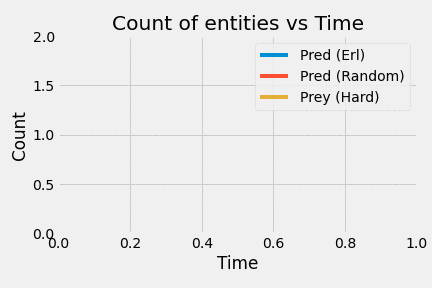

In [9]:
# Data is not in this repo, but this is how we got the images.
# new_alls = get_ave_results('../pickles/experiment_multi_agent_test/proper_exps/v6_proper_simple/preys_pred/*')
# p = plot_pickles(new_alls, "alls_erl_rando_ave_with_pred", ["pred erl", "pred rando", "prey hard"])
Image("gifs/alls_erl_rando_ave_with_pred.gif")

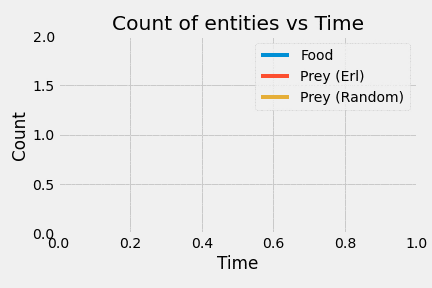

In [10]:
# Data is not in this repo, but this is how we got the images.
# alls = get_ave_results('../pickles/experiment_multi_agent_test/proper_exps/v4_vostro/different_preys/erl_5_rando_5_hard_0*')
# p = plot_pickles(alls, "alls_erl_rando_ave")
Image("gifs/alls_erl_rando_ave.gif")